In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import pitszi

In [2]:
C = pitszi.Model()

                        _  _    ___  ____ _                 
                  _ __ (_)| |_ / __||_  /(_)                
                 | '_ \| ||  _|\__ \ / / | |                
                 | .__/|_| \__||___//___||_|                
                 |_|                                        
   Probing ICM Turbulence from Sunyaev-Zel'dovich Imaging   
------------------------------------------------------------
                           Model                            
------------------------------------------------------------
Setting gNFW Planck coll. (2013) UPP.
Setting SVM Ghirardini (2019) UPP.


Setting model_pressure_fluctuation value
Fixing: R500 if involved


(1e-05, 1)

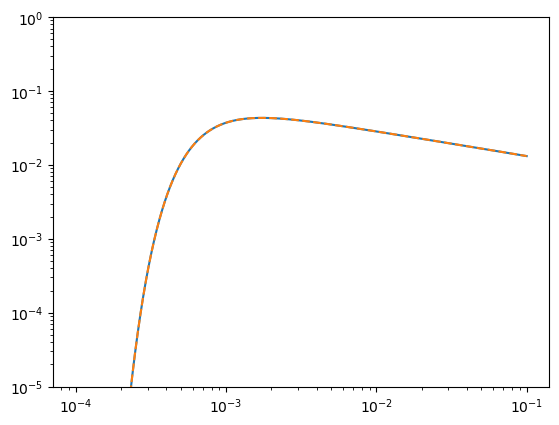

In [4]:
C.model_pressure_fluctuation = {'name': 'CutoffPowerLaw',
                                'statistics': 'gaussian',
                                'Norm': 0.25,
                                'slope': -3.6666666666666665,
                                'Linj': 1000*u.kpc,
                                'Ldis': 1*u.kpc,
                               }

k, pk = C.get_pressure_fluctuation_spectrum()
k2, pk2 = C.get_pressure_fluctuation_spectrum2()
plt.loglog(k.to_value('kpc-1'), (k**3*pk).to_value('')**0.5)
plt.loglog(k2.to_value('kpc-1'), (k2**3*pk2).to_value('')**0.5, ls='--')
plt.ylim(1e-5,1)

In [6]:
C.model_pressure_fluctuation = {'name': 'ModifiedCutoffPowerLaw',
                                'statistics': 'gaussian',
                                'Norm': 0.25,
                                'slope': -3.6666666666666665,
                                'Linj': 100*u.kpc,
                                'Ldis': 1*u.kpc,
                                'Ninj': 1,
                                'Ndis': 1,
                               }

k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k, pk)

Setting model_pressure_fluctuation value
Fixing: R500 if involved


ValueError: No other model implemented yet

In [13]:
k = np.array([0,1,2,3])*u.kpc**-1
pk = np.array([0,1,1,0])*u.kpc**2

C.model_pressure_fluctuation = {'name': 'User',
                                'statistics': 'gaussian',
                                'k': k,
                                'pk': pk}

k,pk = C.get_pressure_fluctuation_spectrum()
plt.loglog(k, pk)

TypeError: pk should be homogeneous to kpc^3